In [2]:
# Import des paquets requis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [3]:
# Lecture des données du fichier CSV (roulez le script pour imu et odom)
df = pd.read_csv("imu_data.csv") 


# Affiche les 5 premières lignes du fichier 
df.head()

,heading,angular_vel,x_acc,y_acc,heading_gt,angular_vel_gt,x_acc_gt,y_acc_gt
0,0.000348,-0.007456,-0.010344,-0.003361,0.0,0.0,0.0,0.0
1,0.007238,0.001281,0.005087,0.004711,0.0,0.0,0.0,0.0
2,-0.006118,0.006626,0.016025,0.002003,0.0,0.0,0.0,0.0
3,-0.003778,-0.007690,-0.004221,-0.004905,0.0,0.0,0.0,0.0
4,-0.000820,0.003073,0.002830,-0.005799,0.0,0.0,0.0,0.0


In [4]:
# Réparti les données en lectures des capteurs et référence (ground_truth)
n, d = df.shape
data = df.iloc[:,:int(d/2)].values
ground_truth = df.iloc[:,int(d/2):].values

In [5]:
#Liste pour le stockage des résultats 
list_heading = []
list_angular_vel = []
list_x_acc = []
list_y_acc = []
variance = []
mean = []

#On tri les résultats par liste
for i in range(0, len(data)):
    list_heading.append(data[i][0])
    list_angular_vel.append(data[i][1])
    list_x_acc.append(data[i][2])
    list_y_acc.append(data[i][3])
    
# ------------- Heading -------------------------
variance_heading = np.var(list_heading)
mean_heading = np.mean(list_heading)

variance.append(variance_heading)
mean.append(mean_heading)

print("Variance pour Heading : \033[31m{:.8f}\033[0m".format(variance_heading))
print(f"Variance pour Heading : {variance_heading}")
print("Moyenne pour heading : \033[31m{:.6f}\033[0m\n".format(mean_heading))


# ------------- angular velocity -------------------------
variance_angular_vel = np.var(list_angular_vel)
mean_angular_vel = np.mean(list_angular_vel)

variance.append(variance_angular_vel)
mean.append(mean_angular_vel)

print("Variance pour vitesse angulaire : \033[31m{:.8f}\033[0m".format(variance_angular_vel))
print(f"Variance pour vitesse angulaire : {variance_angular_vel}")
print("Moyenne pour vitesse angulaire : \033[31m{:.6f}\033[0m\n".format(mean_angular_vel))

# -------------X-axis acceleration-------------------------
variance_x_acc = np.var(list_x_acc)
mean_x_acc = np.mean(list_x_acc)

variance.append(variance_x_acc)
mean.append(mean_x_acc)

print("Variance pour l'accélération selon l'axe des x : \033[31m{:.8f}\033[0m".format(variance_x_acc))
print(f"Variance pour l'accélération selon l'axe des x  : {variance_x_acc}")
print("Moyenne pour l'accélération selon l'axe des x : \033[31m{:.6f}\033[0m\n".format(mean_x_acc))


# -------------Y-axis acceleration-------------------------
variance_y_acc = np.var(list_y_acc)
mean_y_acc = np.mean(list_y_acc)

variance.append(variance_y_acc)
mean.append(mean_y_acc)

print("Variance pour l'accélération selon l'axe des y : \033[31m{:.8f}\033[0m".format(variance_y_acc))
print(f"Variance pour l'accélération selon l'axe des y  : {variance_y_acc}")
print("Moyenne pour l'accélération selon l'axe des y : \033[31m{:.6f}\033[0m\n".format(mean_y_acc))

Variance pour Heading : 0.00002482
Variance pour Heading : 2.4822889213457126e-05
Moyenne pour heading : -0.000022

Variance pour vitesse angulaire : 0.00002424
Variance pour vitesse angulaire : 2.4238010829617694e-05
Moyenne pour vitesse angulaire : 0.000078

Variance pour l'accélération selon l'axe des x : 0.00002437
Variance pour l'accélération selon l'axe des x  : 2.436761908318059e-05
Moyenne pour l'accélération selon l'axe des x : -0.000078

Variance pour l'accélération selon l'axe des y : 0.00002452
Variance pour l'accélération selon l'axe des y  : 2.4522669777637666e-05
Moyenne pour l'accélération selon l'axe des y : -0.000016



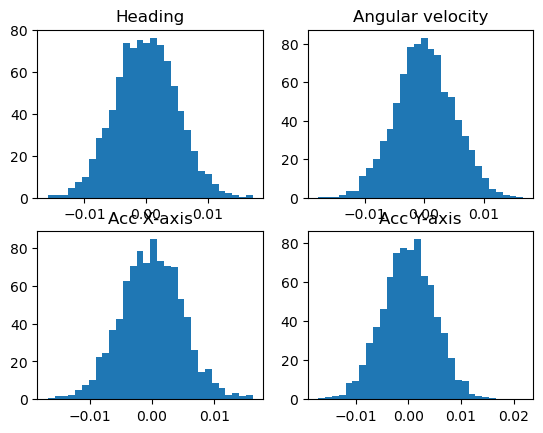

In [6]:
# Affiche les histogrammes des données
fig, ax = plt.subplots(2, 2)
# cpt_plot_x = 0
# cpt_plot_y = 0
color_graph = ["r"]*4

# For heading 
for i in range(int(d/2)):
    
    # For subplot display
    if i == 0:
        ax[i//2][i%2].set_title("Heading")
        color_graph[0] = "r"
    if i == 1:
        ax[i//2][i%2].set_title("Angular velocity")
        color_graph[1] = "b"
    if i == 2:
        ax[i//2][i%2].set_title("Acc X-axis")
        color_graph[2] = "y"
    if i == 3:
        ax[i//2][i%2].set_title("Acc Y-axis")
        color_graph[3] = "g"

    count, bins, ignored =  ax[i//2][i%2].hist(data[:,i], 30, density=True)
    
    #Probleme avec cette ligne 
    #ax[i//2][i%2].plot(bins, 1/(variance[i] * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean[i])**2 / (2 * variance[i]**2) ),
    #         linewidth=2, color=color_graph[i])
plt.show()



In [7]:
# Lecture des données du fichier CSV (roulez le script pour imu et odom)
df = pd.read_csv("encoders_data.csv") 

# Affiche les 5 premières lignes du fichier 
df.head()

,vg,vd,vg_gt,vd_gt
0,0.013193,-0.030017,0.0,0.0
1,0.031466,-0.050756,0.0,0.0
2,-0.027442,0.058055,0.0,0.0
3,0.041751,-0.043170,0.0,0.0
4,0.014340,0.011968,0.0,0.0


In [8]:
# Réparti les données en lectures des capteurs et référence (ground_truth)
n, d = df.shape
data = df.iloc[:,:int(d/2)].values
ground_truth = df.iloc[:,int(d/2):].values

In [9]:
#Liste pour le stockage des résultats 
list_vg = []
list_vd = []
variance = []
mean = []

#On tri les résultats par liste
for i in range(0, len(data)):
    list_vg.append(data[i][0])
    list_vd.append(data[i][1])
    
# ------------- Vg-------------------------
variance_vg = np.var(list_vg)
mean_vg = np.mean(list_vg)

variance.append(variance_vg)
mean.append(mean_vg)

print("Variance pour la vitesse de la roue gauche : \033[31m{:.6f}\033[0m".format(variance_vg))
print(f"Variance pour la vitesse de la roue gauche  : {variance_vg}")
print("Moyenne pour la vitesse de la roue gauche : \033[31m{:.6f}\033[0m\n".format(mean_vg))

# ------------- Vd-------------------------
variance_vd = np.var(list_vd)
mean_vd = np.mean(list_vd)

variance.append(variance_vd)
mean.append(mean_vd)

print("Variance pour vitesse de la roue droite : \033[31m{:.6f}\033[0m".format(variance_vd))
print(f"Variance pour la vitesse de la roue droite  : {variance_vd}")
print("Moyenne pour vitesse de la roue droite : \033[31m{:.6f}\033[0m\n".format(mean_vd))


Variance pour la vitesse de la roue gauche : 0.002072
Variance pour la vitesse de la roue gauche  : 0.00207188799341715
Moyenne pour la vitesse de la roue gauche : 0.001283

Variance pour vitesse de la roue droite : 0.001964
Variance pour la vitesse de la roue droite  : 0.0019638318193607386
Moyenne pour vitesse de la roue droite : -0.000428



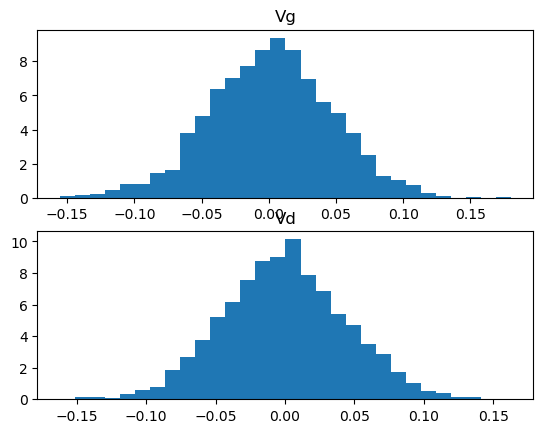

In [10]:
# Affiche les histogrammes des données
fig, ax = plt.subplots(2,1)
# cpt_plot_x = 0
# cpt_plot_y = 0
color_graph = ["r"]*4

# For heading 
for i in range(int(d/2)):
    
    # For subplot display
    if i == 0:
        ax[0].set_title("Vg")
        color_graph[0] = "r"
        count, bins, ignored =  ax[0].hist(data[:,i], 30, density=True)
    if i == 1:
        ax[1].set_title("Vd")
        color_graph[1] = "b"
        count, bins, ignored =  ax[1].hist(data[:,i], 30, density=True)
        
    
    
    #Probleme avec cette ligne 
    #ax[i//2][i%2].plot(bins, 1/(variance[i] * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean[i])**2 / (2 * variance[i]**2) ),
    #         linewidth=2, color=color_graph[i])
plt.show()

